# Modelling Libraries

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import numpy as np
import ontime as on

---
## Generation of random time series

In [3]:
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2022-12-31')

ts = on.generators.random_walk().generate(start=start_date, end=end_date)
ts = ts.astype(np.float32)

---
## Models

- [x] Darts
- [x] Scikit-learn API compatible regressor
- [ ] GluonTS
- [ ] Kats
- [ ] Custom PyTorch
- [ ] Custom TensorFlow

## Darts models

In [4]:
from darts.models import BlockRNNModel

In [5]:
model = on.Model(BlockRNNModel,
                 input_chunk_length=12,
                 output_chunk_length=6,
                 n_rnn_layers=2,
                 n_epochs=50
                 )
model.fit(ts)
model.predict(5)

darts.models.forecasting.torch_forecasting_model INFO  Train dataset contains 348 samples.
darts.models.forecasting.torch_forecasting_model INFO  Time series values are 32-bits; casting model to float32.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 2.0 K 
4 | fc            | Sequential       | 156   
---------------------------------------------------
2.2 K     Trainable params
0         Non-trainable params
2.2 K     Total params
0.009     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[-8.870569]],

       [[-8.218372]],

       [[-8.546895]],

       [[-8.755488]],

       [[-8.256932]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-05
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

## Scikit-learn API compatible models

In [6]:
from sklearn.neural_network import MLPRegressor

In [7]:
model = on.Model(MLPRegressor,
                 lags=30)
model.fit(ts)
model.predict(5)

C:\Users\vince\AppData\Local\pypoetry\Cache\virtualenvs\ontime-FclhqCOu-py3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[ -8.96138357]],

       [[ -9.45770316]],

       [[-10.0736819 ]],

       [[ -9.97869807]],

       [[ -9.96162336]]])
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-05
  * component  (component) object 'pred'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

## Multi series models skforecast

<Axes: xlabel='time'>

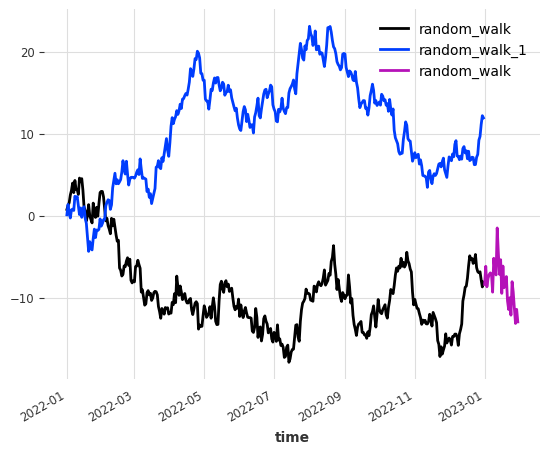

In [11]:
from darts.datasets import EnergyDataset

ts2 = on.generators.random_walk().generate(start=start_date, end=end_date)
ts2 = ts2.astype(np.float32)

model = on.Model(MLPRegressor,
                 level='random_walk',
                 steps=30,
                 lags=30)

ts_multi = ts.concatenate(ts2, axis=1)

ts_multi.plot()

model.fit(ts=ts_multi)
prediction = model.predict(n=30)

prediction.plot()